In [1]:
!git clone https://github.com/Tuchsanai/Apichi_IS_2024.git

Cloning into 'Apichi_IS_2024'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 30 (delta 0), reused 30 (delta 0), pack-reused 0
Receiving objects: 100% (30/30), 5.46 MiB | 20.56 MiB/s, done.


In [2]:
# prompt: go to directory /content/Apichi_IS_2024/Florence_2

%cd /content/Apichi_IS_2024/Florence_2


/content/Apichi_IS_2024/Florence_2


In [3]:
!python --version

Python 3.10.12


In [4]:
import torch
torch.__version__

'2.3.0+cu121'

# Install and import libraries

In [8]:
#!pip install flash_attn einops timm

# pip install transformers
!pip install timm
# pip install packaging
# pip install wheel
# pip install ninja
!pip install flash_attn
# pip install einops
#!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.3 MB/s eta 0:00:00


In [6]:
import textwrap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw, ImageFont
from transformers import AutoProcessor, AutoModelForCausalLM

# Import Florence-2 model

In [9]:
#model_id = 'microsoft/Florence-2-large'
model_id = 'microsoft/Florence-2-base'

model = AutoModelForCausalLM.from_pretrained(model_id,
                                             trust_remote_code=True).eval()
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)




pytorch_model.bin:   0%|          | 0.00/464M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [10]:
def florence2(task_prompt, images, text_input=None):
    """
    Calling the Microsoft Florence2 model
    """
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input

    inputs = processor(text=prompt, images=image, return_tensors="pt")

    generated_ids = model.generate(
        input_ids=inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        max_new_tokens=1024,
        early_stopping=False,
        do_sample=False,
        num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids,
                                            skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text,
        task=task_prompt,
        image_size=(image.width, image.height))

    return parsed_answer



# Image captioning

A man standing next to an elephant in a river.


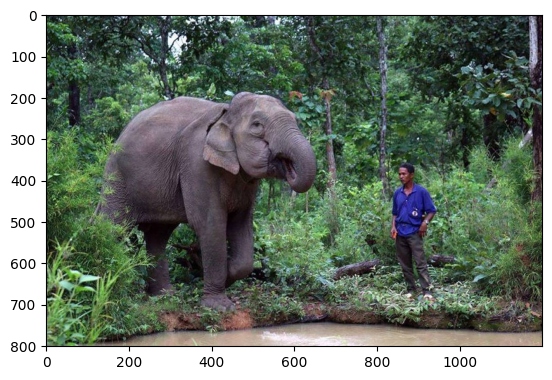

In [15]:
task_prompt = '<CAPTION>'
image = Image.open('./test_images/data/animal1.jpg')
caption1 = list(florence2(task_prompt, image).values())[0]
print(caption1)
plt.imshow(image);

# More detailed caption

The image shows a man standing next to an elephant in a lush green
forest. The man is wearing a blue shirt and khaki pants and is holding
a camera in his hand. The elephant is standing on a small patch of
grass and is facing towards the right side of the image. The
background is filled with trees and bushes, and there is a body of
water visible in the foreground. The sky is overcast and the overall
atmosphere is peaceful and serene.


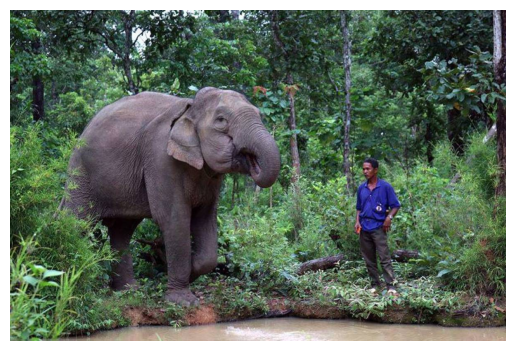

In [17]:
task_prompt2 = '<MORE_DETAILED_CAPTION>'
image = Image.open('./test_images/data/animal1.jpg')
long_caption1 = list(florence2(task_prompt2, image).values())[0]

print('\n'.join(textwrap.wrap(long_caption1)))

plt.imshow(image);
plt.axis('off');

# Object Detection

In [18]:
task_prompt3 = '<OD>'
od_results = florence2(task_prompt3, image)
od_results['<OD>']

{'bboxes': [[115.80000305175781,
   184.6304931640625,
   666.6000366210938,
   717.2954711914062],
  [823.800048828125, 360.04949951171875, 955.800048828125, 676.4445190429688]],
 'labels': ['elephant', 'person']}

In [19]:
def plot_bbox(image, data):
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Plot each bounding box
    for bbox, label in zip(data['bboxes'], data['labels']):
        # Unpack the bounding box coordinates
        x1, y1, x2, y2 = bbox
        # Create a Rectangle patch
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        # Add the rectangle to the Axes
        ax.add_patch(rect)
        # Annotate the label
        plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

    # Remove the axis ticks and labels
    ax.axis('off')

    # Show the plot
    plt.show()

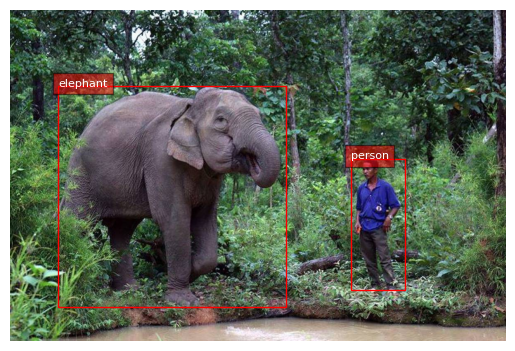

In [20]:
plot_bbox(image, od_results['<OD>']);

# Guided object detection

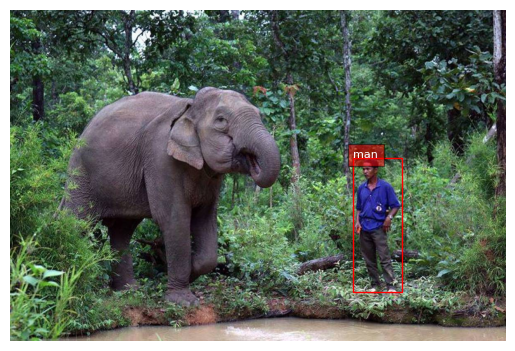

In [21]:
task_prompt4 = "<CAPTION_TO_PHRASE_GROUNDING>"

result = florence2(task_prompt4, image, text_input="man")

plot_bbox(image, result['<CAPTION_TO_PHRASE_GROUNDING>']);

# OCR

In [30]:
task_prompt = '<OCR>'
image = Image.open('./test_images/Site-safety-rules.jpg')

results_ocr = florence2(task_prompt,image)

print(results_ocr)

{'<OCR>': 'SITE SAFETY NOTICEUNAUTHORISED ENTRY TO THISSITE IS STRICTLY PROHIBITEDWARNING CONSTRUCTION IN PROGRESSPARENTS ARE ADVISED TO WARN CHILDRENOF THE DANGERS OF ENTERING CONSTRUCTIONS SITES1. ALL VISITORS MUST REPORT TO THE OFFICE.2. PERMISSION MUST BE OBTAINED BEFORE ENTERING THE SITE OR WORK AREA.3. SAFETYL SIGNAL & PROCEDURES MUST BE OBSERVED.4. PERSONAL PROTECTION & SAFETLY EQUIPMENT MUST BE USED AT ALL TIMES.5. ALL PERSONS ENTERING THIS SITE MUST COMPLY WITH THE REGULATIONS UNDERTHE HEALTH & SALETY AT ACT 2005.SAFETY HELMETS & PROTECTIVE FOOTWEARMUST BE WORN AT ALL TIMESSAFE PASS REQUIREDTO WORK ON THIS SITSITE RULES'}


# OCR with Region

In [33]:
task_prompt = '<OCR_WITH_REGION>'
image = Image.open('/content/Apichi_IS_2024/Florence_2/test_images/text_test.jpg').convert('RGB')

results_ocr = florence2(task_prompt,image)

print(results_ocr)

{'<OCR_WITH_REGION>': {'quad_boxes': [[33.75450134277344, 33.1245002746582, 148.00050354003906, 33.1245002746582, 148.00050354003906, 70.36250305175781, 33.75450134277344, 70.36250305175781], [234.55050659179688, 28.361499786376953, 293.98150634765625, 28.361499786376953, 293.98150634765625, 54.34149932861328, 234.55050659179688, 54.34149932861328], [52.795501708984375, 71.6614990234375, 131.84449768066406, 72.96050262451172, 131.84449768066406, 103.27050018310547, 52.795501708984375, 102.40450286865234], [210.8935089111328, 59.97050094604492, 318.7925109863281, 59.97050094604492, 318.7925109863281, 87.24949645996094, 210.8935089111328, 87.24949645996094], [380.5315246582031, 37.02149963378906, 544.9765014648438, 37.02149963378906, 544.9765014648438, 72.96050262451172, 380.5315246582031, 72.96050262451172], [239.74351501464844, 92.44550323486328, 289.9425048828125, 88.54850006103516, 290.5195007324219, 108.89949798583984, 240.3205108642578, 112.3635025024414], [398.41851806640625, 82.0

In [34]:
def draw_ocr_bboxes(image, prediction):
    """
    Draw OCR BBox
    """
    scale = 1
    draw = ImageDraw.Draw(image)
    bboxes, labels = prediction['quad_boxes'], prediction['labels']

    for box, label in zip(bboxes, labels):
        color = 'lime'
        new_box = (np.array(box) * scale).tolist()
        draw.polygon(new_box, width=4, outline=color)
        draw.text((new_box[0] + 8, new_box[1] + 2),
                  "{}".format(label),
                  align="right",
                  fill=color)

    display(image)

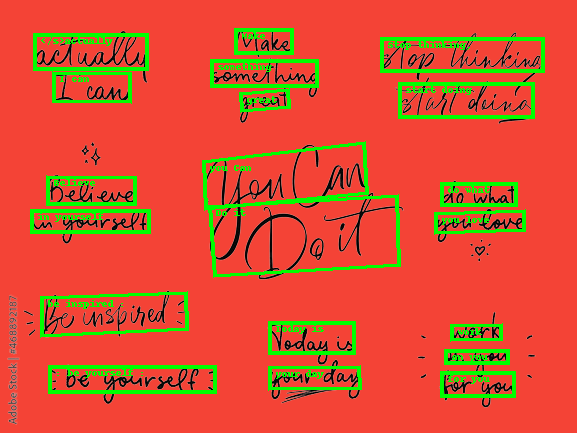

In [35]:
draw_ocr_bboxes(image, results_ocr['<OCR_WITH_REGION>'])

# Segmentation

In [37]:
task_prompt = '<REFERRING_EXPRESSION_SEGMENTATION>'

image = Image.open('./test_images/data/animal1.jpg')
results_seg = florence2(task_prompt,image, text_input="a man")

print(results_seg)

{'<REFERRING_EXPRESSION_SEGMENTATION>': {'polygons': [[[859.800048828125, 363.2535095214844, 862.2000122070312, 361.6514892578125, 864.6000366210938, 360.04949951171875, 867.0000610351562, 359.2485046386719, 870.6000366210938, 358.447509765625, 873.0000610351562, 358.447509765625, 876.6000366210938, 359.2485046386719, 880.2000122070312, 360.04949951171875, 882.6000366210938, 361.6514892578125, 885.0000610351562, 362.4525146484375, 887.4000244140625, 364.8554992675781, 889.800048828125, 366.4574890136719, 891.0000610351562, 368.8605041503906, 892.2000122070312, 371.26348876953125, 892.2000122070312, 383.27850341796875, 891.0000610351562, 384.0794982910156, 889.800048828125, 388.885498046875, 889.800048828125, 394.49249267578125, 888.6000366210938, 395.2934875488281, 887.4000244140625, 398.49749755859375, 887.4000244140625, 404.1044921875, 888.6000366210938, 406.50750732421875, 891.0000610351562, 408.9104919433594, 893.4000244140625, 409.71148681640625, 895.800048828125, 410.512512207031

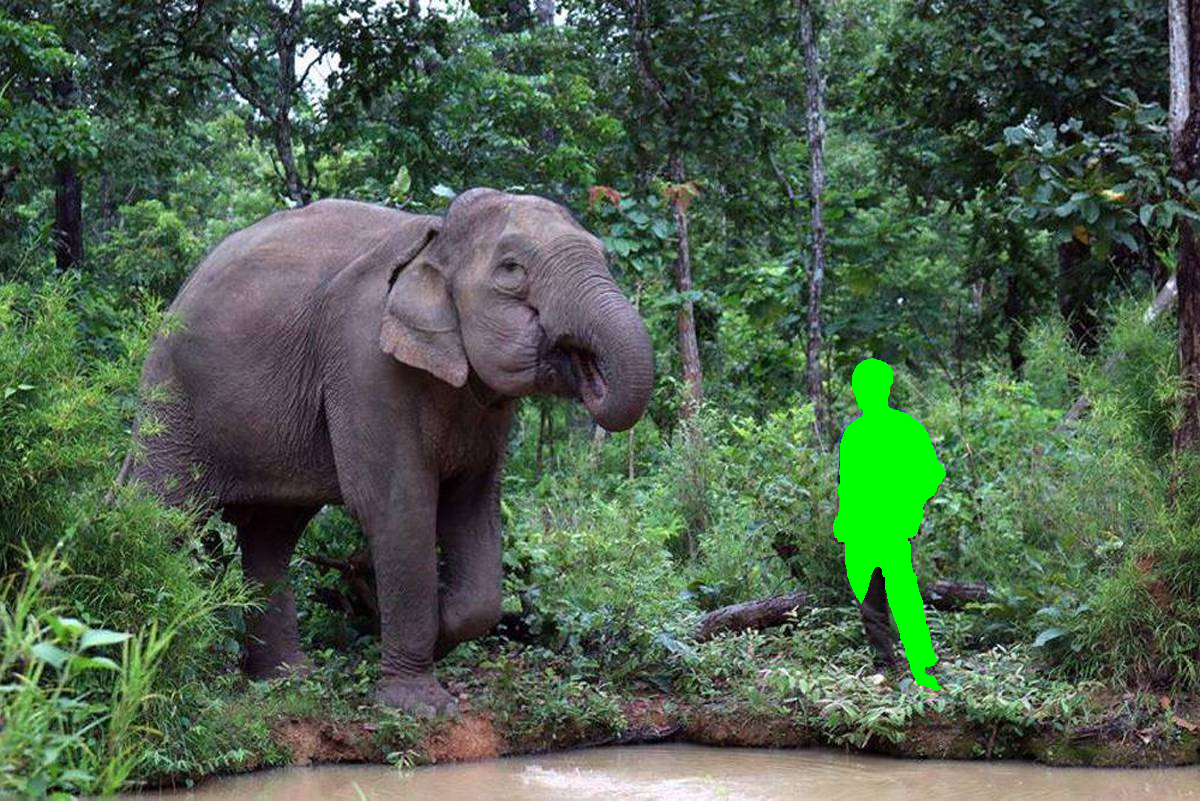

In [38]:
def draw_polygons(image, prediction, fill_mask=False):
    draw = ImageDraw.Draw(image)
    scale = 1

    for polygons, label in zip(prediction['polygons'], prediction['labels']):
        color = "lime"
        fill_color = "lime" if fill_mask else None

        for _polygon in polygons:
            _polygon = np.array(_polygon).reshape(-1, 2)
            if len(_polygon) < 3:
                print('Invalid polygon:', _polygon)
                continue

            _polygon = (_polygon * scale).reshape(-1).tolist()
            if fill_mask:
                draw.polygon(_polygon, outline=color, fill=fill_color)
            else:
                draw.polygon(_polygon, outline=color)
            draw.text((_polygon[0] + 8, _polygon[1] + 2), label, fill=color)

    display(image)


draw_polygons(image,
              results_seg['<REFERRING_EXPRESSION_SEGMENTATION>'],
              fill_mask=True)